In [1]:
import accelerator_environments
import gym
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import TD3

In [2]:
env = gym.make("ARESEA-JOSS-v0")
env = gym.wrappers.Monitor(env, "recordings", video_callable=lambda _: True, force=True)

initializing ocelot...


In [3]:
model = TD3.load("model-cool-galaxy-1")

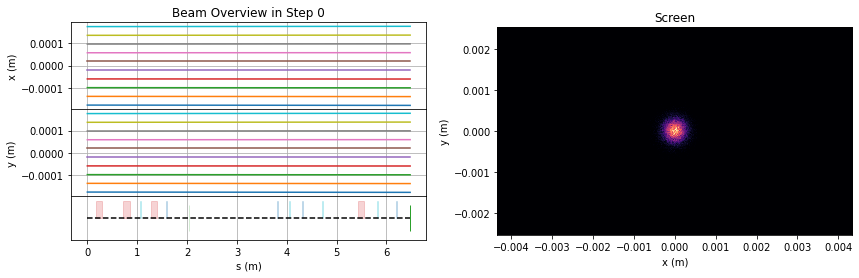

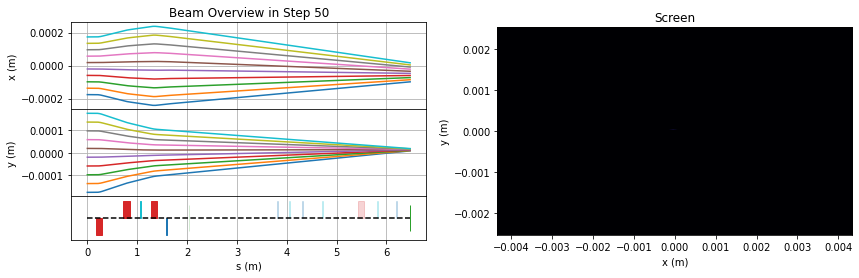

In [4]:
observation = env.reset()

# image_before = env.render(mode="rgb_array")
env.render()
observations = [observation]
rewards = [0]

done = False
while not done:
    action, _ = model.predict(observation, deterministic=True)
    # action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

    observations.append(observation)
    rewards.append(reward)

# image_after = env.render(mode="rgb_array")
env.render()

env.close()

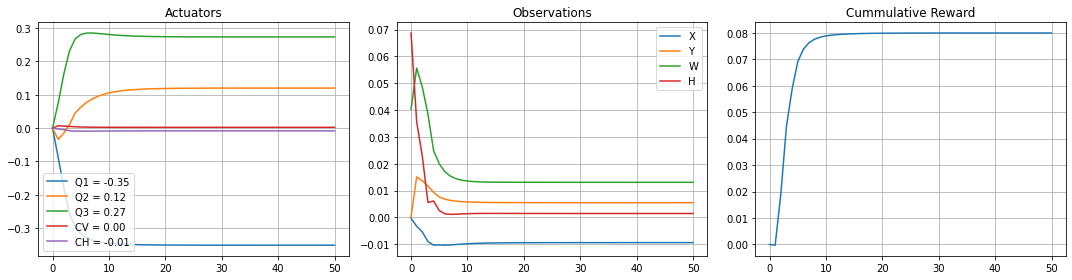

In [5]:
observations = np.array(observations)
cummulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]

screen_extent = (-env.screen_resolution[0] * env.pixel_size[0] / 2, env.screen_resolution[0] * env.pixel_size[0] / 2,
                 -env.screen_resolution[1] * env.pixel_size[1] / 2, env.screen_resolution[1] * env.pixel_size[1] / 2)

plt.figure(figsize=(15,4))

plt.subplot(131)
plt.title("Actuators")
plt.plot(observations[:,4], label=f"Q1 = {observations[-1,4]:.2f}")
plt.plot(observations[:,5], label=f"Q2 = {observations[-1,5]:.2f}")
plt.plot(observations[:,6], label=f"Q3 = {observations[-1,6]:.2f}")
plt.plot(observations[:,7], label=f"CV = {observations[-1,7]:.2f}")
plt.plot(observations[:,8], label=f"CH = {observations[-1,8]:.2f}")
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.title("Observations")
plt.plot(observations[:,0], label="X")
plt.plot(observations[:,1], label="Y")
plt.plot(observations[:,2], label="W")
plt.plot(observations[:,3], label="H")
plt.grid(True)
plt.legend()

plt.subplot(133)
plt.title("Cummulative Reward")
plt.plot(cummulative_rewards)
plt.grid(True)

plt.tight_layout()
plt.show()